# under sampeling by edited knn:


In [1]:
from pycaret.classification import *


In [2]:
import pandas as pd
import numpy as np
dataset=pd.read_excel("C:/Users/97254/Downloads/patient_new.xlsx", engine='openpyxl')
print(dataset.shape)

(867, 70)


In [3]:
dataset = dataset[~dataset['age'].isin(['NAN'])]

In [4]:
target = dataset[['ICU_mortality']]

target.head()

,ICU_mortality
0,0
1,0
2,0
3,0
4,0


In [20]:

X = dataset[['LOS_Group',

'trauma',
'metabolic',
'gastrointestinal',
'Sepsis'
,'age'
,'gender'
,'weight'
,'BMI'
,'active problems'
,'background problems'
,'feeding'
,'Target_pro_day'
,'pro_to_target_day0'
,'pro_to_target_day1'
,'pro_to_target_day2'
,'pro_to_target_day3'
,'pro_to_target_day4'
,'pro_to_target_day5'
,'pro_to_target_day6'
,'pro_to_target_day7'
,'pro_to_target_day8'
,'pro_to_target_day9'
,'pro_to_target_day10'
,'pro_to_target_day11'
,'pro_to_target_day12'
,'pro_to_target_day13'
,'Total_EN_pro'
,'Total_PN_pro'
,'EN_pro_day0'
,'PN_pro_day0'
,'EN_pro_day1'
,'PN_pro_day1'
,'EN_pro_day2'
,'PN_pro_day2'
,'EN_pro_day3'
,'PN_pro_day3'
,'EN_pro_day4'
,'PN_pro_day4'
,'EN_pro_day5'
,'PN_pro_day5'
,'EN_pro_day6'
,'PN_pro_day6'
,'EN_pro_day7'
,'PN_pro_day7'
,'EN_pro_day8'
,'PN_pro_day8'
,'EN_pro_day9'
,'PN_pro_day9'
,'EN_pro_day10'
,'PN_pro_day10'
,'EN_pro_day11'
,'PN_pro_day11'
,'EN_pro_day12'
,'PN_pro_day12'
,'EN_pro_day13'
,'PN_pro_day13'  
,'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg'        
    ]]
print(dataset.shape)

(388, 63)


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['active problems'] = le.fit_transform(X['active problems'].astype(str))
X['background problems'] = le.fit_transform(X['background problems'].astype(str))
X['gender'] = le.fit_transform(X['gender'].astype(str))
X['feeding'] = le.fit_transform(X['feeding'].astype(str))
X['LOS_Group'] = le.fit_transform(X['LOS_Group'].astype(str))

In [22]:
X.head()

,LOS_Group,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,active problems,background problems,feeding,Target_pro_day,pro_to_target_day0,pro_to_target_day1,pro_to_target_day2,pro_to_target_day3,pro_to_target_day4,pro_to_target_day5,pro_to_target_day6,pro_to_target_day7,pro_to_target_day8,pro_to_target_day9,pro_to_target_day10,pro_to_target_day11,pro_to_target_day12,pro_to_target_day13,Total_EN_pro,Total_PN_pro,EN_pro_day0,PN_pro_day0,EN_pro_day1,PN_pro_day1,EN_pro_day2,PN_pro_day2,EN_pro_day3,PN_pro_day3,EN_pro_day4,PN_pro_day4,EN_pro_day5,PN_pro_day5,EN_pro_day6,PN_pro_day6,EN_pro_day7,PN_pro_day7,EN_pro_day8,PN_pro_day8,EN_pro_day9,PN_pro_day9,EN_pro_day10,PN_pro_day10,EN_pro_day11,PN_pro_day11,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,1,0,1,0,1,72,0,65.0,23.875115,1,1,0,84.5,0.961767,0.939582,1.214201,0.765396,1.072544,1.079290,1.079290,1.079290,0.930888,0.000000,0.000000,0.000000,0.000000,0.0,770.830004,0.000000,81.269334,0.000000,79.394668,0.000000,102.600000,0.000000,64.676002,0.000000,90.630000,0.0,91.200000,0.0,91.200000,0.0,91.200000,0.0,78.660000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,1,0,0,1,1,44,1,70.0,22.857143,2,2,1,91.0,0.524735,1.140478,1.162168,1.164145,0.197275,0.000000,0.599011,0.062183,0.213392,0.210169,0.000000,0.520628,0.585421,0.0,216.038656,364.505424,0.000000,47.750864,0.000000,103.783475,1.628126,104.129203,97.745868,8.191366,17.951996,0.0,0.000000,0.0,54.510000,0.0,5.658667,0.0,19.418667,0.0,19.125333,0.0,0.00000,0.0,0.000000,47.377161,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
2,1,0,0,0,1,63,1,80.0,23.374726,1,1,0,104.0,0.604154,1.064301,1.217676,0.819337,1.021119,1.073077,1.073077,1.238107,1.288982,1.193210,1.144615,0.015103,0.000000,0.0,1222.286742,0.000000,62.832000,0.000000,110.687310,0.000000,126.638323,0.000000,85.211062,0.000000,106.196327,0.0,111.600000,0.0,111.600000,0.0,128.763138,0.0,134.054099,0.0,124.093847,0.0,119.03997,0.0,1.570666,0.000000,0.0,0.000000,0.0,0.0,0.785400,1.383591,1.582979,1.065138,1.327454,1.395000
3,0,0,1,1,0,90,1,70.0,21.604938,0,2,0,91.0,0.424615,0.516718,0.801758,0.441805,0.567630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,250.480001,0.000000,38.640000,0.000000,47.021333,0.000000,72.960001,0.000000,40.204299,0.000000,51.654368,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.552000,0.671733,1.042286,0.574347,0.737920,0.000000
4,1,0,0,0,1,60,0,60.0,24.341758,1,2,0,78.0,0.630291,0.783350,0.532889,0.532260,0.676893,0.676923,0.380499,0.682564,0.812308,0.812308,0.812308,0.685385,0.000000,0.0,625.402285,0.000000,49.162667,0.000000,61.101332,0.000000,41.565333,0.000000,41.516314,0.000000,52.797682,0.0,52.799999,0.0,29.678959,0.0,53.239999,0.0,63.360000,0.0,63.360000,0.0,63.36000,0.0,53.460000,0.000000,0.0,0.000000,0.0,0.0,0.819378,1.018356,0.692756,0.691939,0.879961,0.880000


# under_sampling

In [23]:
from imblearn.under_sampling import EditedNearestNeighbours
  
#Edited Nearest Neighbours: This algorithm removes any sample which has labels different from those of its adjoining classes.
#pramaters to use:(ratio='auto', return_indices=False, random_state=None, size_ngh=None, n_neighbors=3, kind_sel='all', n_jobs=1)
en = EditedNearestNeighbours()
dataset, target = en.fit_resample(X, target)

In [24]:

downsampled = pd.concat([dataset, target],axis=1)

# checking counts
downsampled.ICU_mortality.value_counts()

1    188
0    157
Name: ICU_mortality, dtype: int64

In [27]:
X.shape

(388, 63)

In [29]:
from sklearn.model_selection import train_test_split
#this function randomly split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(downsampled.iloc[:,:63], downsampled.iloc[:,63], test_size=.2)
#test_size=.3 means that our test set will be 30% of the train set.
data = pd.concat([x_train, y_train],axis=1)
data.head()

,LOS_Group,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,active problems,background problems,feeding,Target_pro_day,pro_to_target_day0,pro_to_target_day1,pro_to_target_day2,pro_to_target_day3,pro_to_target_day4,pro_to_target_day5,pro_to_target_day6,pro_to_target_day7,pro_to_target_day8,pro_to_target_day9,pro_to_target_day10,pro_to_target_day11,pro_to_target_day12,pro_to_target_day13,Total_EN_pro,Total_PN_pro,EN_pro_day0,PN_pro_day0,EN_pro_day1,PN_pro_day1,EN_pro_day2,PN_pro_day2,EN_pro_day3,PN_pro_day3,EN_pro_day4,PN_pro_day4,EN_pro_day5,PN_pro_day5,EN_pro_day6,PN_pro_day6,EN_pro_day7,PN_pro_day7,EN_pro_day8,PN_pro_day8,EN_pro_day9,PN_pro_day9,EN_pro_day10,PN_pro_day10,EN_pro_day11,PN_pro_day11,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg,ICU_mortality
8,1,1,1,1,0,56,0,80.0,31.250000,2,1,0,104.0,0.368500,0.576936,0.771692,0.754205,0.812307,0.812307,0.779025,0.662256,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,575.871879,0.0,38.324000,0.0,60.001332,0.0,80.255980,0.0,78.437314,0.0,84.479979,0.0,84.479979,0.0,81.018647,0.0,68.874649,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.479050,0.750017,1.003200,0.980466,1.056000,1.056000,0
191,1,0,1,0,0,71,1,75.0,25.951557,7,1,0,97.5,0.364702,0.898795,1.423914,1.435077,1.435077,1.265846,1.096615,0.322892,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,803.684579,0.0,35.558442,0.0,87.632546,0.0,138.831590,0.0,139.920000,0.0,139.920000,0.0,123.420000,0.0,106.920000,0.0,31.482000,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.474113,1.168434,1.851088,1.865600,1.865600,1.645600,1
260,0,1,1,0,0,67,1,65.0,21.224490,5,8,0,84.5,0.002604,0.433515,0.431716,0.431716,0.431716,0.295006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,171.220000,0.0,0.220000,0.0,36.632000,0.0,36.480000,0.0,36.480000,0.0,36.480000,0.0,24.928000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.003385,0.563569,0.561231,0.561231,0.561231,0.383508,1
235,1,0,1,0,0,73,1,75.0,25.951557,0,1,0,97.5,0.681272,0.748308,0.748308,0.518619,0.173593,0.433231,0.527699,0.649846,0.649846,0.649846,0.649846,0.649846,0.310031,0.0,720.553335,0.0,66.424000,0.0,72.960000,0.0,72.960000,0.0,50.565333,0.0,16.925333,0.0,42.240000,0.0,51.450668,0.0,63.360000,0.0,63.36,0.0,63.36,0.0,63.36,0.0,63.36,0.0,30.228,0.0,0.0,0.0,0.885653,0.972800,0.972800,0.674204,0.225671,0.563200,1
192,0,0,1,1,0,50,1,105.0,34.285714,0,1,0,136.5,0.356638,0.517553,0.517613,0.517613,0.517613,0.517613,0.395758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,455.964856,0.0,48.681134,0.0,70.645958,0.0,70.654188,0.0,70.654188,0.0,70.654188,0.0,70.654188,0.0,54.021014,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.463630,0.672819,0.672897,0.672897,0.672897,0.672897,1


# models exploration

In [30]:
from pycaret.classification import *
model_setup = setup(data=data, target='ICU_mortality', data_split_stratify = True)


,Description,Value
0,session_id,7334
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(276, 64)"
5,Missing Values,False
6,Numeric Features,59
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [31]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7934,0.8334,0.7573,0.8592,0.7921,0.5890,0.6021,0.0100
et,Extra Trees Classifier,0.7350,0.8133,0.7564,0.7693,0.7583,0.4670,0.4734,0.0560
gbc,Gradient Boosting Classifier,0.6787,0.7375,0.7300,0.7311,0.7129,0.3504,0.3696,0.0430
lightgbm,Light Gradient Boosting Machine,0.6584,0.7447,0.7409,0.6816,0.6986,0.3054,0.3325,0.0170
lr,Logistic Regression,0.6576,0.7404,0.7445,0.6815,0.7060,0.3005,0.3067,0.4470
rf,Random Forest Classifier,0.6371,0.7542,0.7300,0.6729,0.6861,0.2582,0.2787,0.0670
dt,Decision Tree Classifier,0.6150,0.6082,0.6900,0.6467,0.6628,0.2163,0.2206,0.0060
ridge,Ridge Classifier,0.6111,0.0000,0.6773,0.6469,0.6560,0.2072,0.2087,0.0060
lda,Linear Discriminant Analysis,0.6050,0.6279,0.6491,0.6500,0.6433,0.1959,0.1994,0.0090
svm,SVM - Linear Kernel,0.5958,0.0000,0.5255,0.7169,0.4944,0.1971,0.2749,0.0170


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


# KNN

In [32]:
#for more info: https://pycaret.org/tune-model/
model = create_model("knn")
tuned_rf = tune_model(model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6500,0.5455,0.8182,0.6429,0.7200,0.2708,0.2851
1,0.8000,0.7879,1.0000,0.7333,0.8462,0.5789,0.6383
2,0.6500,0.7475,0.7273,0.6667,0.6957,0.2857,0.2872
3,0.6316,0.7222,1.0000,0.5882,0.7407,0.2312,0.3616
4,0.7368,0.7222,1.0000,0.6667,0.8000,0.4571,0.5443
5,0.5263,0.7778,0.8000,0.5333,0.6400,0.0229,0.0272
6,0.5789,0.7333,0.9000,0.5625,0.6923,0.1264,0.1674
7,0.4737,0.6023,0.7273,0.5333,0.6154,-0.1585,-0.1789
8,0.6842,0.7045,0.9091,0.6667,0.7692,0.3049,0.3441
9,0.7368,0.7955,1.0000,0.6875,0.8148,0.4099,0.5078


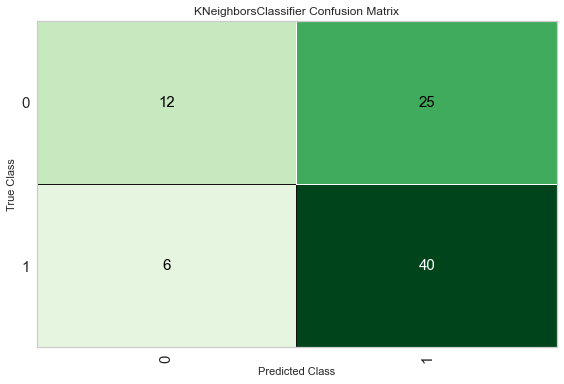

In [33]:
plot_model(tuned_rf, plot = 'confusion_matrix')

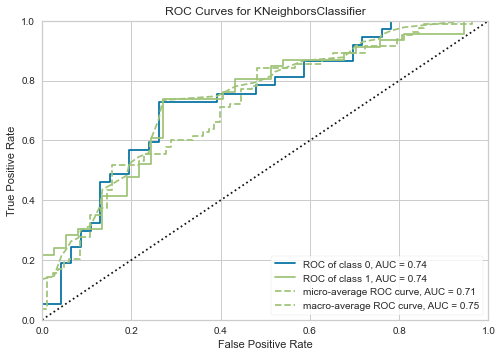

In [34]:
plot_model(tuned_rf, plot = 'auc')

In [41]:
#List Hyperparameters that we want to tune.
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = [1,10,20]
p=[1,2]
#Convert to dictionary
hyperparameters = dict( n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10,scoring="recall")
#Fit the model
best_model = clf.fit(x_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 2
Best n_neighbors: 1


In [42]:
print( best_model.best_score_)


0.7683333333333333


In [43]:
y_pred = best_model.best_estimator_.predict(x_test)
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, y_pred))

[[33  0]
 [ 9 27]]
